<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220829_sincurve_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사인 함수를 3차 다항식의 계수를 이용해 예측
 - 알고리즘 : MLP
 - 데이터셋 : 사용 X
 - 문제유형 : 회귀
 - 평가지표 : 평균 제곱 오차

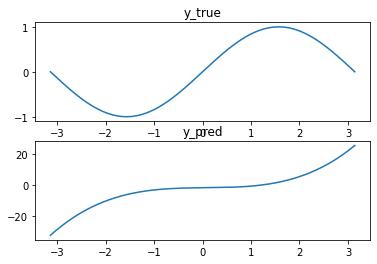

In [26]:
import math
import torch
import matplotlib.pyplot as plt

# -pi부터 +pi 사이에서 점 1,000개를 추출
x = torch.linspace(-math.pi, math.pi, 1000) # np.linspace() 와 사용방법 동일
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 예측 사인곡선에 사용할 임의의 가중치(계수)를 뽑아 y만들기
a = torch.randn(()) # torch.randn() : 평균0, 표준편차1인 랜덤 실수
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x **3 + b * x **2 + c * x + d

# 1. 실제 사인 곡선으로 실제 y값 만들기
plt.subplot(2,1,1)
plt.title('y_true')
plt.plot(x, y)

# 2. 임의의 가중치로 만든 y값 만들기
plt.subplot(2,1,2)
plt.title('y_pred')
plt.plot(x, y_random);

 - 임의의 가중치인 a,b,c,d는 학습되기 전이기 때문에 완전히 다른모양의 그래프

In [19]:
y_random.shape

torch.Size([1000])

epoch1 loss:122134.578125
epoch101 loss:1207.283447265625
epoch201 loss:1010.1643676757812
epoch301 loss:846.2833251953125
epoch401 loss:709.2085571289062
epoch501 loss:594.535888671875
epoch601 loss:498.5886535644531
epoch701 loss:418.2978515625
epoch801 loss:351.09783935546875
epoch901 loss:294.8460388183594
epoch1001 loss:247.75198364257812
epoch1101 loss:208.31951904296875
epoch1201 loss:175.29733276367188
epoch1301 loss:147.63999938964844
epoch1401 loss:124.47273254394531
epoch1501 loss:105.06413269042969
epoch1601 loss:88.80242156982422
epoch1701 loss:75.17573547363281
epoch1801 loss:63.75565719604492
epoch1901 loss:54.1838493347168


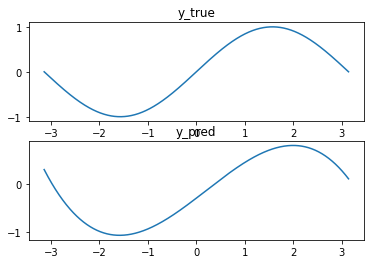

In [27]:
learning_rate = 0.000001 # 학습률 정의(1e-6)

# 학습 2,000번 진행
for epoch in range(2000):
    # 반복문의 첫 시작에서는 a,b,c,d 랜덤한 실수로 시작(앞서 정의함)
    y_pred = a * x **3 + b * x **2 + c * x + d

    # 손실(loss) 정의
    loss = (y_pred - y).pow(2).sum().item() # y_pred, y는 각각 1000개의 값을 갖고 있음(by linspace)
    # 100번째 마다 epoch의 loss 출력
    if epoch % 100 == 0:
        print(f'epoch{epoch+1} loss:{loss}')
    
    # 가중치의 미분값 정의
    # 손실(loss)을 y로 미분 : dloss/dy → 손실에 대한 y의 영향
    grad_y_pred = 2.0 * (y_pred - y) # toch.tensor() 형식이며, torch.size([1000])
    # 손실(loss)을 a로 미분 : dloss/da = dloss/dy * dy/da → 손실에 대한 a의 영향
    grad_a = (grad_y_pred * x ** 3).sum()
    # 손실(loss)을 b로 미분 : dloss/db = dloss/dy * dy/db
    grad_b = (grad_y_pred * x ** 2).sum()
    # 손실(loss)을 c로 미분 : dloss/dc = dloss/dy * dy/dc
    grad_c = (grad_y_pred * x).sum()
    # 손실(loss)을 d로 미분 : dloss/dd = dloss/dy * dy/dd
    grad_d = grad_y_pred.sum()

    # 가중치 업데이트
    a -= learning_rate * grad_a # 가중치를 손실에 대한 영향력 만큼 수정
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    # 반복문의 처음으로 돌아갈때는 업데이트 된 가중치를 가지고 가게됨

# 1. 실제 사인 곡선으로 실제 y값 만들기
plt.subplot(2,1,1)
plt.title('y_true')
plt.plot(x, y)

# 2. 임의의 가중치로 만든 y값 만들기
plt.subplot(2,1,2)
plt.title('y_pred')
plt.plot(x, y_pred);

 - torch.sin(x)는 x가 -pi부터 pi범위 안에서는 3차함수의 곡선 형상
 - 따라서, 임의의 3차함수의 학습을 통해 유사한 곡선을 만들 수 있음